**BERT**# 1. Data Cleaning
This notebook aims to use perform data cleaning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -qqq unidecode contractions pyspellchecker wordninja symspellpy emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
# imports data analysis packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# NLP Imports
import nltk
nltk.download('all')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import emoji

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import wordninja

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
# Change to own directory
try:
    os.chdir("/content/drive/MyDrive/MyProject_SIDetection")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


## Load dataset

In [ ]:
# Load dataset
data = pd.read_csv('Suicide_Detection.csv',index_col=0)
data.reset_index(drop=True, inplace=True)
data.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
#Checking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
#make to string and continue
data['text'] = data['text'].astype(str)

In [ ]:
# Function to clean text
import re

data['text'] = data['text'].apply(lambda text: emoji.demojize(text))

def simplify_punctuation(text):
    # Replace occurrences of three or more punctuation marks with the single version of the mark
    text = re.sub(r'(\!)\1{2,}', r'\1', text)  # Simplify multiple exclamation marks
    text = re.sub(r'(\?)\1{2,}', r'\1', text)  # Simplify multiple question marks
    text = re.sub(r'(\.)\1{2,}', r'\1', text)  # Simplify multiple periods
    return text

data['text'] = data['text'].apply(simplify_punctuation)

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user and subreddit tags
    text = re.sub(r'u/\w+|r/\w+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters (keep periods and commas for BERT)
    text = re.sub(r"[^a-zA-Z0-9.,'\u2019]+", ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s\s+', ' ', text).strip()
    return text

# Apply cleaning function to the text column
data['text'] = data['text'].apply(clean_text)

In [ ]:
#def remove_emojis(text):
    # Find all emojis in the text
    #emojis = emoji.emoji_list(text)
    # Sort emojis by start location in descending order
    #for emj in sorted(emojis, key=lambda x: x['match_start'], reverse=True):
        # Replace each emoji with an empty string
        #text = text[:emj['match_start']] + text[emj['match_end']:]
    #return text

def processing_text(text):
    clean_list_with_emojis = []
    clean_list_without_emojis = []
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    stop_words_set = set(stopwords.words("english"))

    # Convert emojis to words
    text_with_emojis = emoji.demojize(text)

    # Remove emojis for the without_emojis text
    text_without_emojis = remove_emojis(text)

    # Tokenize and convert to lowercase
    #words_with_emojis = tokenizer.tokenize(text_with_emojis.lower())
    #words_without_emojis = tokenizer.tokenize(text_without_emojis.lower())

    # Light clean tokenize, remain original case
    lightclean = word_tokenize(text_without_emojis)

    # Lemmatize and remove stop words
    #clean_words_with_emojis = [lemmatizer.lemmatize(word) for word in words_with_emojis if word not in stop_words_set]
    #clean_words_without_emojis = [lemmatizer.lemmatize(word) for word in words_without_emojis if word not in stop_words_set]

    # Join cleaned words into a string
    #clean_text_with_emojis = ' '.join(clean_words_with_emojis)
    #clean_text_without_emojis = ' '.join(clean_words_without_emojis)
    lightclean_text_with_emojis = ' '.join(lightclean)

    return lightclean_text_with_emojis #clean_text_with_emojis, clean_text_without_emojis,

# Apply the function to each row in the 'text' column of the DataFrame.
#data['text'] = data['text'].apply(processing_text)

# Unpack the results into two separate columns
# data['text_clean_with_emojis'], data['text_clean_without_emojis'],
#data['lightclean_text_with_emojis'] = zip(*results)

# Check the result
#pd.set_option("display.max_colwidth", 100)
#print(data[['text', 'text_clean_with_emojis', 'text_clean_without_emojis','lightclean_text_with_emojis']].head(8))

#print(data[['text','lightclean_text_with_emojis']].head(8))

In [ ]:
# After EDA, "filler" is meaningless word
# Remove anomalous "filler" word
# data['text_clean_without_emojis'] = data['text_clean_without_emojis'].str.replace('filler', '')
# data['text_clean_with_emojis'] = data['text_clean_with_emojis'].str.replace('filler', '')

In [ ]:
#Checking on 'text_clean_with_emojis' and 'text_clean_without_emojis'
#pd.set_option("display.max_colwidth", 1000)
#data[['text','text_clean_with_emojis','text_clean_without_emojis']].head(2)

In [ ]:
#Checking on 'lightclean_text_with_emojis'
#pd.set_option("display.max_colwidth", 1000)
#data[['text','lightclean_text_with_emojis']].head(4)

In [ ]:
#Added another column the 'suicide' and 'non-suicide' values to 1 and 0 respectively
data['label'] = data['class'].map({'suicide': 1, 'non-suicide': 0})

In [ ]:
#checking if the function introduced missing data into new cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
 2   label   232074 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
#double checking if the functions introduced missing data
data.isnull().sum()

text     0
class    0
label    0
dtype: int64

In [ ]:
# Export preprocessed dataset
# data.to_csv('Data_preprocessed_Transformer.csv', index=False)

In [ ]:
df = data[['text','label']]
df['text'] = data['text'].str.replace(r'\s\s+', ' ', regex=True)
df = df[df['text'] != 'nan']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   label   232074 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


<ipython-input-39-b38e7dd3c955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = data['text'].str.replace(r'\s\s+', ' ', regex=True)


In [ ]:
df.head(100)

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over. So I can never he...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam 16 and I’ve ...",1
...,...,...
95,day 3 of posting something i get mildly infuri...,0
96,A lot of stuff to handle at once for me Sorry ...,0
97,I'm going to wait for a version of senorita In...,0
98,You know I just realized you cant have an opin...,0


In [ ]:
df.to_csv('Data_Cleaned_Transformer.csv', index=False)

In [ ]:
# Load dataset
data = pd.read_csv('Data_Cleaned_Transformer.csv')
data.reset_index(drop=True, inplace=True)
data.head(100)

,text,class,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don t get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over. So I can never he...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I m so lostHello, my name is Adam 16 and I ve ...",suicide,1
...,...,...,...
95,day 3 of posting something i get mildly infuri...,non-suicide,0
96,A lot of stuff to handle at once for me Sorry ...,non-suicide,0
97,I m going to wait for a version of senorita In...,non-suicide,0
98,You know I just realized you cant have an opin...,non-suicide,0


1    116037
0    116037
Name: label, dtype: int64
1    0.5
0    0.5
Name: label, dtype: float64


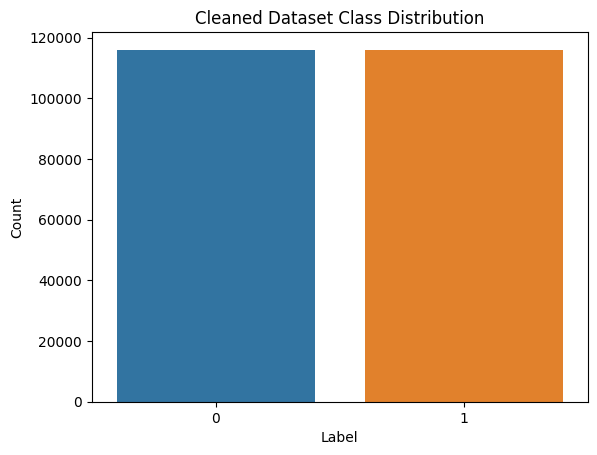

In [ ]:
# Check class distribution
print(df['label'].value_counts())
print(df['label'].value_counts(normalize=True))

sns.countplot(x=data['label'])
plt.title('Cleaned Dataset Class Distribution')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()